### Analisis Saham dengan Exponential Smoothing (EMA) dan Trendline
### Dataset: `all_stocks_5yr.csv`

### Langkah:
### 1. Preprocessing Dataset
### 2. Forecasting dengan EMA
### 3. Membuat Trendline

## 1. Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Load Dataset

In [12]:
df = pd.read_csv('all_stocks_5yr.csv')

## Show first 5 lines

In [13]:
print(df.head())


         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


## 3. Preprocessing Dataset

### 3.1. Convert `date` Column to Datetime Format

In [14]:
df['date'] = pd.to_datetime(df['date'])

### 3.2. Sorting Data by Date

In [15]:
df = df.sort_values('date')

### 3.3. Filter Data for Specific Stocks (Example: AAL - American Airlines)

In [16]:
stock_name = 'AAL'
stock_data = df[df['Name'] == stock_name]

### 3.4. Cek Missing Values

In [17]:
print("Missing Values:")
print(stock_data.isnull().sum())

Missing Values:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


### cause there is no missing values, we can directly use the data

## 4. Forecasting dengan Exponential Smoothing (EMA)

In [18]:
span = 10  # Periode EMA
stock_data['EMA'] = stock_data['close'].ewm(span=span, adjust=False).mean()

/tmp/ipykernel_73842/704753159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA'] = stock_data['close'].ewm(span=span, adjust=False).mean()


### 4.2. Plot Data Actual vs Predicted (EMA)

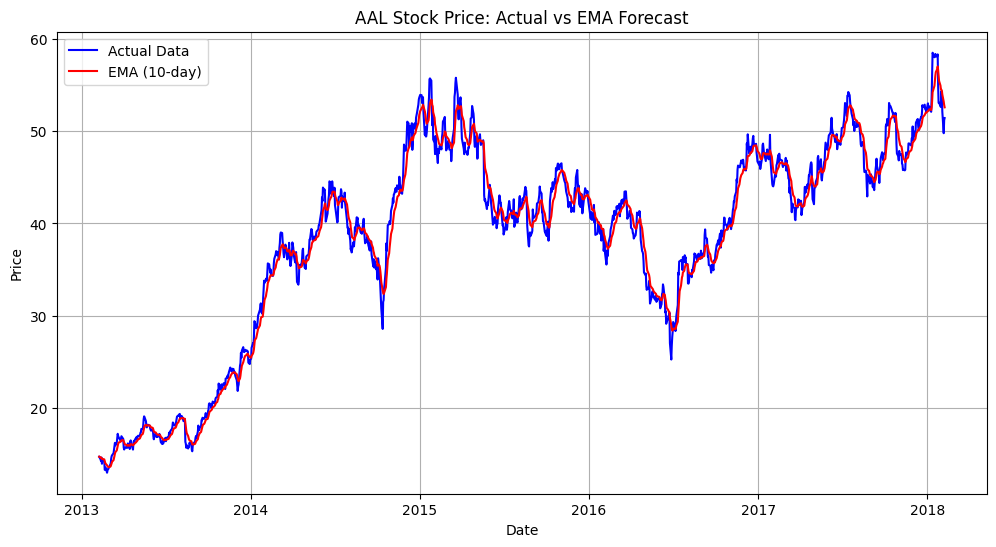

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label='Actual Data', color='blue')
plt.plot(stock_data['date'], stock_data['EMA'], label=f'EMA ({span}-day)', color='red')
plt.title(f'{stock_name} Stock Price: Actual vs EMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Plot EMA:

    Garis biru: Harga penutupan aktual (close).

    Garis merah: Pergerakan EMA.

## 5. Make Trendline

### 5.1. Calculate Trendline Using Linear Regression

In [20]:
x = np.arange(len(stock_data))  # make index array 
y = stock_data['close']
coefficients = np.polyfit(x, y, 1)  # Regresi linier (degree=1)
trendline = np.poly1d(coefficients)
stock_data['Trendline'] = trendline(x)

/tmp/ipykernel_73842/34384149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Trendline'] = trendline(x)


### 5.2. Plot Trendline

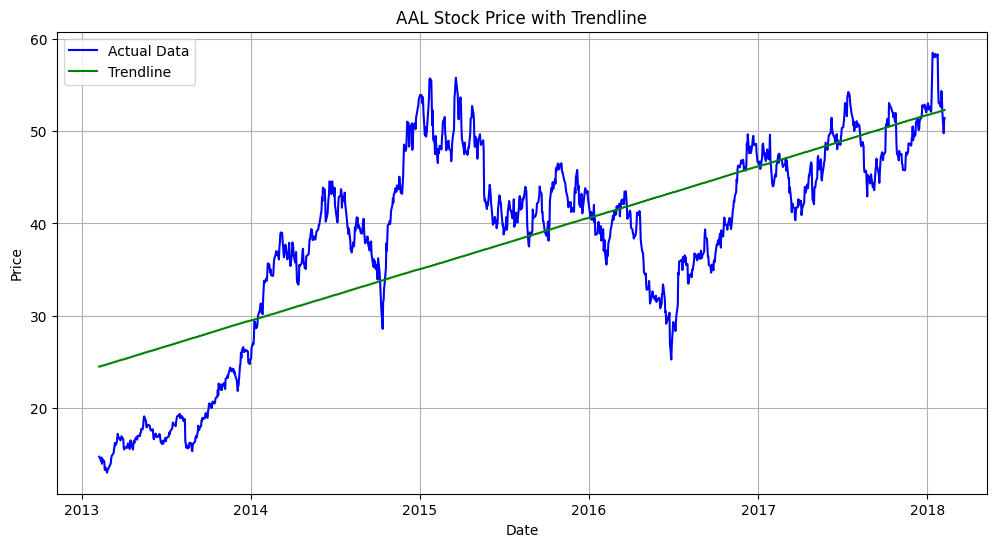

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label='Actual Data', color='blue')
plt.plot(stock_data['date'], stock_data['Trendline'], label='Trendline', color='green')
plt.title(f'{stock_name} Stock Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Plot Trendline:

    Garis biru: Harga penutupan aktual (close).

    Garis hijau: Trendline.

## KESIMPULAN

1. Grafik EMA (Exponential Moving Average)
    - Perbandingan Data Aktual vs EMA:
        -   Garis biru (Data Aktual) menunjukkan pergerakan harga saham AAL dari tahun 2013 hingga 2018.
        -   Garis merah (EMA 10-hari) menunjukkan pergerakan rata-rata harga saham dengan memberikan bobot lebih besar pada data terbaru.
        -   EMA cenderung mengikuti pergerakan data aktual, tetapi lebih halus (smooth) karena merupakan rata-rata bergerak.
    -  Interpretasi: 
        - EMA dapat digunakan untuk mengidentifikasi tren jangka pendek. Misalnya, jika EMA berada di bawah harga aktual, ini bisa mengindikasikan tren naik (bullish), dan sebaliknya.
        - Pada grafik ini, terlihat bahwa EMA cukup responsif terhadap perubahan harga, terutama pada periode volatilitas tinggi.

2. Grafik Trendline
    - Perbandingan Data Aktual vs Trendline:
        - Garis biru (Data Aktual) menunjukkan pergerakan harga saham AAL.
        - Garis hijau (Trendline) menunjukkan arah umum (trend) pergerakan harga saham selama periode tersebut.
        - Trendline dihitung menggunakan regresi linier, sehingga memberikan gambaran tentang tren jangka panjang.
    - Interpretasi:
        - Trendline menunjukkan bahwa secara umum, harga saham AAL cenderung menurun (downtrend) dari tahun 2013 hingga 2018.
        - Meskipun terdapat fluktuasi harga (naik-turun), tren jangka panjangnya negatif.

# KESIMPULAN UMUM

1. Tren Jangka Panjang: Saham AAL menunjukkan tren penurunan (downtrend) dari tahun 2013 hingga 2018, berdasarkan analisis trendline.
2. Tren Jangka Pendek: EMA (10-hari) mengindikasikan fluktuasi harga yang cukup responsif, menunjukkan volatilitas dalam jangka pendek.
3. Rekomendasi: Investor jangka panjang perlu berhati-hati karena tren negatif, sementara trader jangka pendek dapat memanfaatkan EMA untuk identifikasi peluang beli atau jual. Analisis lebih lanjut disarankan untuk keputusan investasi yang lebih akurat.